#### Planta hidroelectrica

Una planta hidroeléctrica opera con un caudal promedio de 5 $\frac{m^3}{s}$. En epoca de estiage este caudal puede resucirse hasta 2.7 $\frac{m^3}{s}$. Considerando que la caída es de 50 m y la turbina tiene una capacidad de operación de 180 rpm, un torque de $1.16 \times10^5$ $N\cdot m$  el generador tiene una capacidad de 2100 kW. Determine: 
1. Si los rangos operativos sustentan el generador
2. La cantidad de energeia que se pierde y podria indicar cambios en el dimensionamiento de la turbina
3. La probabilidad de que el generador opere por debajo de su capacidad

##### Solución 

Paqueterias utilizadas

In [1]:
using PyPlot, Distributions, Random

Datos proporcionados

In [2]:
Q_max = 5.0 # m^3/s
Q_min = 2.7 # m^3/s
h = 50.0 # m
rpm_turb = 180.0 # rpm 
τ = 1.16e5 # N*m
W_gen = 2100.0 # kW
ρ = 1000.0 # kg/m^3
g = 9.81 #m/s^2

9.81

Generamos datos aleatorios usando una distribución uniforme que abarque los rangos de $Q_{min}$ y $Q_{máx}$

In [3]:
D = Uniform(Q_min, Q_max)
Q = rand(D, 1000)

1000-element Vector{Float64}:
 4.98821707676885
 3.512701178995382
 3.3477267613072548
 3.2859254066720442
 4.178807069132514
 4.462166168194655
 3.192999730690079
 3.8439045818452255
 2.700520655315575
 3.6236477740656863
 3.1208703631094457
 2.7270795014711178
 3.9049223906265667
 ⋮
 4.478041458516442
 4.6155053438825675
 3.440480543682694
 4.3522526429401225
 4.643170487637951
 4.561833728695015
 3.878777554934686
 3.3832538326518886
 3.62593696943979
 3.387484059750604
 3.6929095024248273
 2.726920872711451

Creamos vectores vacios donde se guardaran cada dato calculado

In [4]:
W_turb = [] # Potencia de la turbina 
rpm_obt = [] # rpm generada en la turbina
W_perdida = [] # Potencia que la turbina no aprovecha
W_gen_max = [] # Limite de energia del generador
Q_excedente = [] # Caudales a los cuales se suministra más suficient energia al generador
W_excedente = [] # Energia excedente del generado

Any[]

Con un ciclo realizamos el cálculo para cada valor de caudal contenido en nuestro vector $Q$. El ciclo interno realiza la comparación de la energia perdida para cada caudal, lo agrega en el vector correspondiente e imprime la cantidad de energia perdida. La ultima instrucción nos permite generar el limite de potencia que el generador puede aceptar. 

In [5]:
for i in eachindex(Q)
    Ep_cal =  Q[i]*ρ*g*h/1000 # Energia generada en la turbina por la caida de agua 
    append!(W_turb, Ep_cal)
    rpm_cal = (W_turb[i]*60)/(τ*2π) # rpm dadas por la turbina
    append!(rpm_obt, rpm_cal)
    if W_turb[i] > W_gen
        append!(W_perdida, W_turb[i] - W_gen)
        println("Cantidad de energia perdida en el caudal [", i,"] de ", round(Q[i], digits = 4), " m^3/s = ", round(W_turb[i] - W_gen, digits = 4), " kW")
        append!(Q_excedente, Q[i])
        append!(W_excedente, W_turb[i])
    end
    append!(W_gen_max, Q[i]*0 + 2100) # Limite de energia del generador
end

Cantidad de energia perdida en el caudal [1] de 4.9882 m^3/s = 346.7205 kW
Cantidad de energia perdida en el caudal [6] de 4.4622 m^3/s = 88.6925 kW
Cantidad de energia perdida en el caudal [17] de 4.9424 m^3/s = 324.2472 kW
Cantidad de energia perdida en el caudal [20] de 4.7982 m^3/s = 253.52 kW
Cantidad de energia perdida en el caudal [28] de 4.6316 m^3/s = 171.8161 kW
Cantidad de energia perdida en el caudal [30] de 4.4994 m^3/s = 106.9569 kW
Cantidad de energia perdida en el caudal [31] de 4.8388 m^3/s = 273.4246 kW
Cantidad de energia perdida en el caudal [32] de 4.5195 m^3/s = 116.7914 kW
Cantidad de energia perdida en el caudal [36] de 4.5777 m^3/s = 145.3722 kW
Cantidad de energia perdida en el caudal [38] de 4.3384 m^3/s = 27.9923 kW
Cantidad de energia perdida en el caudal [42] de 4.7733 m^3/s = 241.3025 kW
Cantidad de energia perdida en el caudal [50] de 4.9199 m^3/s = 313.2322 kW
Cantidad de energia perdida en el caudal [51] de 4.7605 m^3/s = 235.0233 kW
Cantidad de energi

Finalmente creamos el gráfico que representa nuestro sistema haciendo uso de los valores calculados.

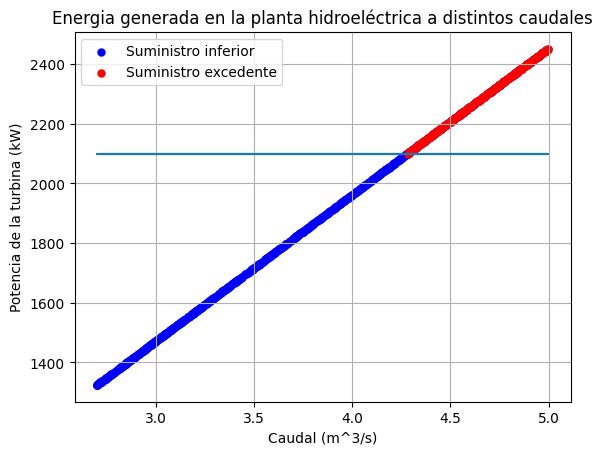

In [6]:
title("Energia generada en la planta hidroeléctrica a distintos caudales")
scatter(Q, W_turb, color="b", linewidth=0.05)
scatter(Q_excedente, W_excedente, color="r", linewidth=0.05)
plot(Q, W_gen_max)
legend(["Suministro inferior" , "Suministro excedente"])
xlabel("Caudal (m^3/s)")
ylabel("Potencia de la turbina (kW)")
grid()

In [7]:
println("Cantidad total de energia perdida = ", round(sum(W_perdida), digits=4), " kW")
println("\nProbabilidad de que el generador opere por debajo de 2100 kW: ", (length(Q) - length(W_perdida))/length(Q)*100, "%" )

Cantidad total de energia perdida = 55554.9106 kW

Probabilidad de que el generador opere por debajo de 2100 kW: 69.8%
